# Ejercicio k-Nearest Neighbor

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Leemos nuestro archivo de entrada

In [12]:
dataframe = pd.read_csv("reviews_sentiment.csv",sep=';')
#dataframe.head(10)

In [ ]:
dataframe.describe()

## Rápidas visualizaciones

In [ ]:
dataframe.hist()
plt.show()

In [ ]:
print(dataframe.groupby('Star Rating').size())

In [ ]:
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

In [ ]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

## Preparamos el dataset

In [14]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo

In [15]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


## Resultados obtenidos

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Gráfica de la Clasificación Obtenida

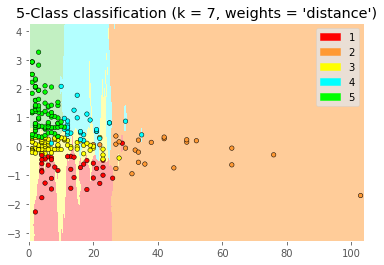

In [16]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

## Cómo obtener el mejor valor de k

([<matplotlib.axis.XTick at 0x2913dcc9a90>,
 <a list of 5 Text xticklabel objects>)

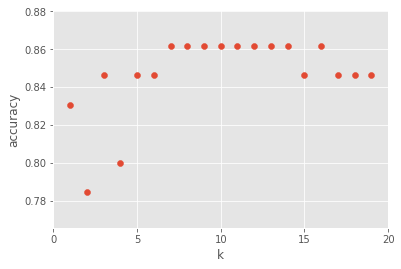

In [17]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Text(0,0.5,'Error Rate')

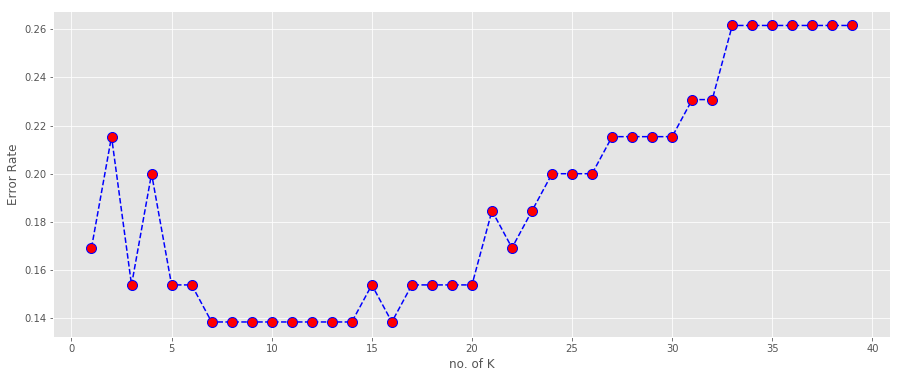

In [18]:
import numpy as np
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(15,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='10')
plt.xlabel('no. of K')
plt.ylabel('Error Rate')

# Predicciones

In [ ]:
print(clf.predict([[5, 1.0]]))


In [ ]:
print(clf.predict_proba([[20, 0.0]]))